In [1]:
import pandas as pd
pd.set_option('mode.chained_assignment', None)

In [2]:
# load data
chemdiv_df = pd.read_pickle('../data/ECFP_datasets/chemdiv_ECFP6_v4_dedup_all.pkl')
enamine_df = pd.read_pickle('../data/ECFP_datasets/enamine_ECFP6_v4_dedup_all.pkl')
enamine_protein_df = pd.read_pickle('../data/ECFP_datasets/enamine_protein_ECFP6_v4_dedup_all.pkl')
life_chemicals_df = pd.read_pickle('../data/ECFP_datasets/life_chemicals_ECFP6_v4_dedup_all.pkl')
robin_df = pd.read_pickle('../data/ECFP_datasets/robin_ECFP6_v4_dedup_all.pkl')

In [3]:
combined_df = pd.concat([chemdiv_df, enamine_df, enamine_protein_df, life_chemicals_df, robin_df], ignore_index=True)
combined_df[combined_df.duplicated(subset='SMILES')]

,source,mol,SMILES,ECFP6


In [4]:
rna_df_picked = pd.concat([chemdiv_df, enamine_df, life_chemicals_df, robin_df], ignore_index=True)
rna_df_picked.shape

(38710, 4)

In [5]:
# use diversity picking to select 36937 compounds from enamine_protein_df
# protein_df_picked = enamine_protein_df.sample(n=36937, random_state=42)

In [6]:
# load the dataframes
enamine_protein_df.shape

(456080, 4)

In [7]:
rna_df_picked['source'].unique()
# print number of unique RNA sources and their  counts
print(f'Number of unique RNA sources: {len(rna_df_picked["source"].unique())}')
print(f'Number of unique RNA sources: {rna_df_picked["source"].value_counts()}')


Number of unique RNA sources: 4
Number of unique RNA sources: source
chemdiv           19908
enamine           11502
life_chemicals     5308
robin              1992
Name: count, dtype: int64


In [8]:
enamine_protein_df.head(1)

,source,mol,SMILES,ECFP6
0,enamine_protein,<rdkit.Chem.rdchem.Mol object at 0x7f6123e36570>,CCc1nn(C)cc1NC(=O)c1cnn(CC(=O)NC2CCCCC2)c1,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [9]:

# using 'source' column separate rna_df_picked and protein_df_picked to datarames
enamine_protein = enamine_protein_df.copy()
chemdiv = chemdiv_df.copy()
enamine = enamine_df.copy()
life_chemicals =  life_chemicals_df.copy()
robin = robin_df.copy()

In [10]:
# what are the count of each dataframe
print(f'Enamine_Protein: {enamine_protein.shape}')
print(f'ChemDiv_RNA: {chemdiv.shape}')
print(f'Enamine_RNA: {enamine.shape}')
print(f'Life_chemicals_RNA: {life_chemicals.shape}')
print(f'ROBIN_RNA: {robin.shape}')

Enamine_Protein: (456080, 4)
ChemDiv_RNA: (19908, 3)
Enamine_RNA: (11502, 4)
Life_chemicals_RNA: (5308, 4)
ROBIN_RNA: (1992, 4)


In [11]:

# # Load datasets pickle from ../data/standardized_data
# chemdiv_enamine_rna = pd.read_pickle('../data/standardized_data/chemdiv_enamine_rna_df.pkl')
# enamine_protein = pd.read_pickle('../data/standardized_data/enamine_protein_df.pkl')
# life_chemicals = pd.read_pickle('../data/standardized_data/life_chemicals_df.pkl')
# robin_df = pd.read_pickle('../data/standardized_data/robin_df.pkl')


In [12]:
# reset indexes on the dataframes
all_dataframes = [enamine_protein, chemdiv, enamine, life_chemicals, robin_df]
for df in all_dataframes:
    df.reset_index(inplace=True, drop=True)

In [13]:
from rdkit.Chem.Scaffolds import MurckoScaffold
from rdkit import Chem


def get_murcko_scaffold(mol):
    try:
        scaffold = MurckoScaffold.GetScaffoldForMol(mol)
        scaffold = Chem.MolToSmiles(scaffold, canonical=True)
    except ValueError:
        scaffold = ""
    return scaffold

def get_csk_scaffold(mol):
    try:
        scaffold = MurckoScaffold.GetScaffoldForMol(mol)
        scaffold = MurckoScaffold.MakeScaffoldGeneric(scaffold)
        scaffold = MurckoScaffold.GetScaffoldForMol(scaffold)
        scaffold = Chem.MolToSmiles(scaffold, canonical=True)
    except ValueError:
        scaffold = ""
    return scaffold

In [14]:
enamine_protein['Murcko_scafold'] = enamine_protein['mol'].apply(get_murcko_scaffold)
chemdiv['Murcko_scafold'] = chemdiv['mol'].apply(get_murcko_scaffold)
enamine['Murcko_scafold'] = enamine['mol'].apply(get_murcko_scaffold)
life_chemicals['Murcko_scafold'] = life_chemicals['mol'].apply(get_murcko_scaffold)
robin_df['Murcko_scafold'] = robin_df['mol'].apply(get_murcko_scaffold)

enamine_protein['CSK_scafold'] = enamine_protein['mol'].apply(get_csk_scaffold)
chemdiv['CSK_scafold'] = chemdiv['mol'].apply(get_csk_scaffold)
enamine['CSK_scafold'] = enamine['mol'].apply(get_csk_scaffold)
life_chemicals['CSK_scafold'] = life_chemicals['mol'].apply(get_csk_scaffold)
robin_df['CSK_scafold'] = robin_df['mol'].apply(get_csk_scaffold)


In [15]:
import os

# create folder scaffolds
if not os.path.exists('../output/scaffolds'):
    os.makedirs('../output/scaffolds')

In [16]:
# save pandas dataframes as pkl
enamine_protein.to_pickle('../output/scaffolds/enamine_protein_scaffolds.pkl')
chemdiv.to_pickle('../output/scaffolds/chemdiv_rna_scaffolds.pkl')
enamine.to_pickle('../output/scaffolds/enamine_rna_scaffolds.pkl')
life_chemicals.to_pickle('../output/scaffolds/life_chemicals_scaffolds.pkl')
robin_df.to_pickle('../output/scaffolds/robin_scaffolds.pkl')


In [17]:
# load the dataframes
enamine_protein = pd.read_pickle('../output/scaffolds/enamine_protein_scaffolds.pkl')
chemdiv = pd.read_pickle('../output/scaffolds/chemdiv_rna_scaffolds.pkl')
enamine = pd.read_pickle('../output/scaffolds/enamine_rna_scaffolds.pkl')
life_chemicals = pd.read_pickle('../output/scaffolds/life_chemicals_scaffolds.pkl')
robin_df = pd.read_pickle('../output/scaffolds/robin_scaffolds.pkl')

In [18]:
# Count scaffold occurrences murcko sorted
prot_scaffold_counts_murcko = enamine_protein['Murcko_scafold'].value_counts()
chemdiv_scaffold_counts_murcko = chemdiv['Murcko_scafold'].value_counts()
enamine_scaffold_counts_murcko = enamine['Murcko_scafold'].value_counts()
lc_scaffold_counts_murcko = life_chemicals['Murcko_scafold'].value_counts()
robin_scaffold_counts_murcko = robin_df['Murcko_scafold'].value_counts()
 
# Count scaffold occurrences CSK sorted
prot_scaffold_counts_csk = enamine_protein['CSK_scafold'].value_counts()
chemdiv_scaffold_counts_csk = chemdiv['CSK_scafold'].value_counts()
enamine_scaffold_counts_csk = enamine['CSK_scafold'].value_counts()
lc_scaffold_counts_csk = life_chemicals['CSK_scafold'].value_counts()
robin_scaffold_counts_csk = robin_df['CSK_scafold'].value_counts()

In [19]:
# create a df from series Murcko
prot_scaffold_counts_murcko = pd.DataFrame(prot_scaffold_counts_murcko).reset_index()
prot_scaffold_counts_murcko['source'] = 'Protein Binder Enamine'
chemdiv_scaffold_counts_murcko = pd.DataFrame(chemdiv_scaffold_counts_murcko).reset_index()
chemdiv_scaffold_counts_murcko['source'] = 'Chemdiv RNA'
enamine_scaffold_counts_murcko = pd.DataFrame(enamine_scaffold_counts_murcko).reset_index()
enamine_scaffold_counts_murcko['source'] = 'Enamine RNA'
lc_scaffold_counts_murcko = pd.DataFrame(lc_scaffold_counts_murcko).reset_index()
lc_scaffold_counts_murcko['source'] = 'Life Chemicals RNA'
robin_scaffold_counts_murcko = pd.DataFrame(robin_scaffold_counts_murcko).reset_index()
robin_scaffold_counts_murcko['source'] = 'ROBIN RNA'

# create a df from series CSK
prot_scaffold_counts_csk = pd.DataFrame(prot_scaffold_counts_csk).reset_index()
prot_scaffold_counts_csk['source'] = 'Protein Binder Enamine'
chemdiv_scaffold_counts_csk = pd.DataFrame(chemdiv_scaffold_counts_csk).reset_index()
chemdiv_scaffold_counts_csk['source'] = 'Chemdiv RNA'
enamine_scaffold_counts_csk = pd.DataFrame(enamine_scaffold_counts_csk).reset_index()
enamine_scaffold_counts_csk['source'] = 'Enamine RNA'
lc_scaffold_counts_csk = pd.DataFrame(lc_scaffold_counts_csk).reset_index()
lc_scaffold_counts_csk['source'] = 'Life Chemicals RNA'
robin_scaffold_counts_csk = pd.DataFrame(robin_scaffold_counts_csk).reset_index()
robin_scaffold_counts_csk['source'] = 'ROBIN RNA'

In [20]:
# drop index in all dfs if there is any
dfs = [prot_scaffold_counts_murcko, chemdiv_scaffold_counts_murcko, enamine_scaffold_counts_murcko, lc_scaffold_counts_murcko, robin_scaffold_counts_murcko,
       prot_scaffold_counts_csk, chemdiv_scaffold_counts_csk, enamine_scaffold_counts_csk, lc_scaffold_counts_csk, robin_scaffold_counts_csk]

for df in dfs:
    if 'index' in df.columns:
        df.drop('index', axis=1, inplace=True)

In [21]:
# create a df with 5 most occuring scaffolds from each dataset (Murcko)
prot_scaffold_counts_murcko_top5 = prot_scaffold_counts_murcko.head(5)
chemdiv_scaffold_counts_murcko_top5 = chemdiv_scaffold_counts_murcko.head(5)
enamine_scaffold_counts_murcko_top5 = enamine_scaffold_counts_murcko.head(5)
lc_scaffold_counts_murcko_top5 = lc_scaffold_counts_murcko.head(5)
robin_scaffold_counts_murcko_top5 = robin_scaffold_counts_murcko.head(5)
 
 # create a df with 5 most occuring scaffolds from each dataset (CSK)
prot_scaffold_counts_csk_top5 = prot_scaffold_counts_csk.head(5)
chemdiv_scaffold_counts_csk_top5 = chemdiv_scaffold_counts_csk.head(5)
enamine_scaffold_counts_csk_top5 = enamine_scaffold_counts_csk.head(5)
lc_scaffold_counts_csk_top5 = lc_scaffold_counts_csk.head(5)
robin_scaffold_counts_csk_top5 = robin_scaffold_counts_csk.head(5)

In [22]:
# sum of scaffolds counts for each dataset
prot_sum_murcko = prot_scaffold_counts_murcko['count'].sum()
chemdiv_sum_murcko = chemdiv_scaffold_counts_murcko['count'].sum()
enamine_sum_murcko = enamine_scaffold_counts_murcko['count'].sum()
lc_sum_murcko = lc_scaffold_counts_murcko['count'].sum()
robin_sum_murcko = robin_scaffold_counts_murcko['count'].sum()

prot_sum_csk = prot_scaffold_counts_csk['count'].sum()
chemdiv_sum_csk = chemdiv_scaffold_counts_csk['count'].sum()
enamine_sum_csk = enamine_scaffold_counts_csk['count'].sum()
lc_sum_csk = lc_scaffold_counts_csk['count'].sum()
robin_sum_csk = robin_scaffold_counts_csk['count'].sum()

In [23]:
robin_sum_csk

1992

In [24]:
# concatenate all dataframes
scaffold_counts_murcko = pd.concat([prot_scaffold_counts_murcko_top5, chemdiv_scaffold_counts_murcko_top5, enamine_scaffold_counts_murcko_top5, lc_scaffold_counts_murcko_top5, robin_scaffold_counts_murcko_top5], ignore_index=True)

scaffold_counts_csk = pd.concat([prot_scaffold_counts_csk_top5, chemdiv_scaffold_counts_csk_top5, enamine_scaffold_counts_csk_top5, lc_scaffold_counts_csk_top5, robin_scaffold_counts_csk_top5], ignore_index=True)


In [25]:
# Create new column 'ratio' in scaffold_counts_murcko dataframe
allowed_sources = ['Protein Binder Enamine', 'Chemdiv RNA', 'Enamine RNA', 'Life Chemicals RNA', 'ROBIN RNA']


# Function to calculate the ratio
def calculate_ratio(row, prot_sum, chemdiv_sum, enamine_sum, life_sum, robin_sum):
    if row['source'] == allowed_sources[0]:
        ratio = (row['count'] / prot_sum) * 100
    elif row['source'] == allowed_sources[1]:
        ratio = (row['count'] / chemdiv_sum) * 100
    elif row['source'] == allowed_sources[2]:
        ratio = (row['count'] / enamine_sum) * 100
    elif row['source'] == allowed_sources[3]:
        ratio = (row['count'] / life_sum) * 100
    elif row['source'] == allowed_sources[4]:
        ratio = (row['count'] / robin_sum) * 100
    return f"{ratio:.2f}%"

# Create new column 'ratio' in scaffold_counts_murcko dataframe
scaffold_counts_murcko['ratio_to_the_sum(scaffolds)'] = scaffold_counts_murcko.apply(
    lambda row: calculate_ratio(row, prot_sum_murcko, chemdiv_sum_murcko, enamine_sum_murcko, lc_sum_murcko, robin_sum_murcko), axis=1)

# Create new column 'ratio' in scaffold_counts_csk dataframe
scaffold_counts_csk['ratio_to_the_sum(scaffolds)'] =  scaffold_counts_csk.apply(
    lambda row: calculate_ratio(row, prot_sum_csk, chemdiv_sum_csk, enamine_sum_csk, lc_sum_csk, robin_sum_csk), axis=1)


In [26]:
scaffold_counts_murcko

,Murcko_scafold,count,source,ratio_to_the_sum(scaffolds)
0,c1ccccc1,5490,Protein Binder Enamine,1.20%
1,O=S(=O)(Nc1ccccc1)c1ccccc1,2090,Protein Binder Enamine,0.46%
2,O=C(Nc1ccccc1)c1ccccc1,1571,Protein Binder Enamine,0.34%
3,O=C(c1ccccc1)N1CCCCC1,1165,Protein Binder Enamine,0.26%
4,O=S(=O)(c1ccccc1)N1CCCCC1,997,Protein Binder Enamine,0.22%
5,O=C(Nc1ccccc1)c1ccccc1,209,Chemdiv RNA,1.05%
6,c1ccc(CN2CCN(Cc3ccccc3)CC2)cc1,89,Chemdiv RNA,0.45%
7,O=C(c1ccccc1)N1CCN(Cc2ccccc2)CC1,75,Chemdiv RNA,0.38%
8,c1ccccc1,69,Chemdiv RNA,0.35%
9,c1ccc(C2=NN[C@H](c3ccccc3)C2)cc1,39,Chemdiv RNA,0.20%


In [27]:
scaffold_counts_csk

,CSK_scafold,count,source,ratio_to_the_sum(scaffolds)
0,C1CCC(CCC2CCCCC2)CC1,12107,Protein Binder Enamine,2.65%
1,C1CCC(CCCC2CCCC2)CC1,10055,Protein Binder Enamine,2.20%
2,C1CCC(CCCC2CCCCC2)CC1,9741,Protein Binder Enamine,2.14%
3,C1CCC(CCC2CCCC2)CC1,9652,Protein Binder Enamine,2.12%
4,C1CCC(CC2CCCCC2)CC1,7673,Protein Binder Enamine,1.68%
5,C1CCC(CCC2CCCCC2)CC1,297,Chemdiv RNA,1.49%
6,C1CCC(CC2CCC(CC3CCCCC3)CC2)CC1,268,Chemdiv RNA,1.35%
7,C1CCC(CCCCC2CCCCC2)CC1,143,Chemdiv RNA,0.72%
8,C1CCC(CCCC2CCCCC2)CC1,143,Chemdiv RNA,0.72%
9,C1CCC(CC2CCCCC2)CC1,127,Chemdiv RNA,0.64%


In [28]:
from rdkit import Chem
import mols2grid
from collections import Counter
from rdkit.Chem import Draw

import os
import PIL.Image


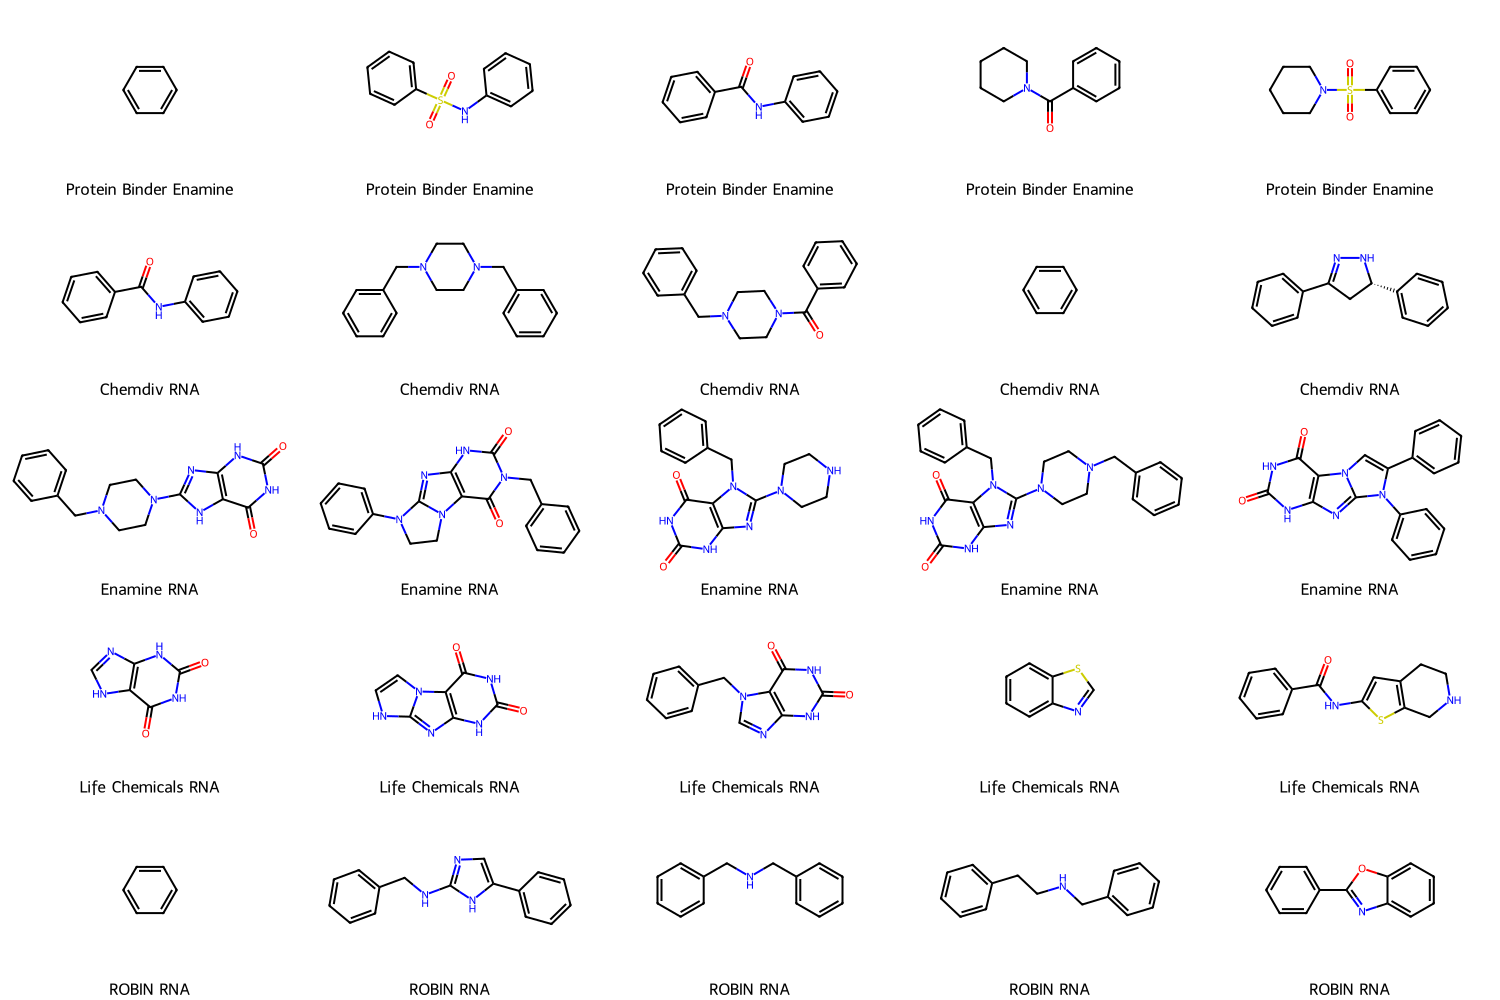

In [29]:
# Visualize most common scaffolds murcko

# Visualize most common scaffolds and their counts
molecules = [Chem.MolFromSmiles(smiles) for smiles in scaffold_counts_murcko['Murcko_scafold']]

# Legends need to include the count and the formatted ratio/source string
# legends = [
#     f"{count}: {ratio} ({source})"
#     for count, ratio, source in zip(scaffold_counts_murcko['count'], scaffold_counts_murcko['ratio_to_the_sum(scaffolds)'], scaffold_counts_murcko['source'])
# ]

legends = [
    f"{source}"
    for source in scaffold_counts_murcko['source']
]

# Create the image grid with the specified options
img_ls_mrc = Draw.MolsToGridImage(
    molecules,
    molsPerRow=5,
    subImgSize=(300, 200),
    useSVG=True,
    legends=legends
)

# Display the grid (depends on your environment; might differ in a notebook or a script)
img_ls_mrc

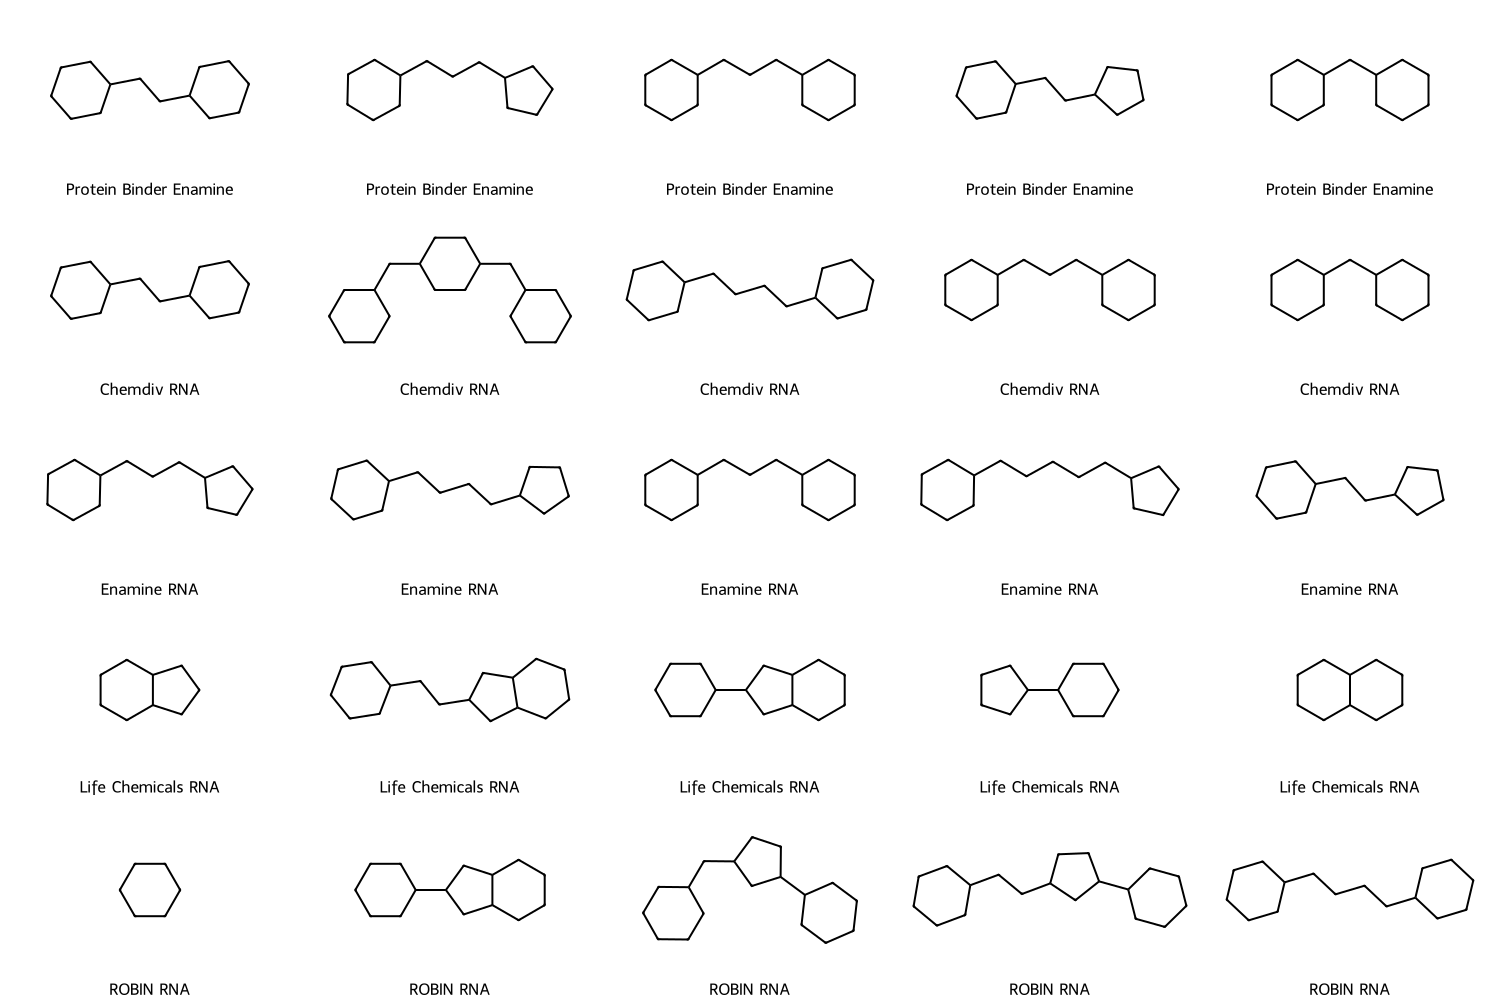

In [30]:
# Assuming scaffold_counts_csk dataframe is properly set with necessary columns
# Generate molecule objects from SMILES strings
molecules_csk = [Chem.MolFromSmiles(smiles) for smiles in scaffold_counts_csk['CSK_scafold']]

# Legends need to include the formatted ratio/source string
# legends = [
#     f"{count}: {ratio} ({source})"
#     for count, ratio, source in zip(scaffold_counts_csk['count'], scaffold_counts_csk['ratio_to_the_sum(scaffolds)'], scaffold_counts_murcko['source'])
# ]

legends = [
    f"{source}"
    for source in scaffold_counts_csk['source']
]

# Create the image grid with the specified options
img_ls_csk = Draw.MolsToGridImage(
    molecules_csk,
    molsPerRow=5,
    subImgSize=(300, 200),
    useSVG=True,
    legends=legends
)

# Display the grid (depends on your environment; might differ in a notebook or a script)
img_ls_csk
